## <span style="color:blue"><b>QLKNN -EDGE data analysis </b></span>


### <span style="color:blue"><b>The objective of this notebook is to:</b></span>
    
  
#### <span style="color:green"><b>  1. Investigate QLKNN filter pipeline stages using the edge dataset from karel "folded_netcdf.nc.1" to test and  decide in which stage of data extraction we can convert to IMAS without a lot of code changing and check the filters we need for including 'kthetarhos' and gam_GB: Growth rate GB, ome_GB:  Frequency GB. </b></span>
#### <span style="color:green"><b>  2. Data quality and visualisation and check relations between the different dimentions. </b></span>
#### <span style="color:green"><b> 3. Compare and report the changes in the intermediate stage from folded to prepared ncdf files </b></span>
#### Please check the [link](https://gitlab.com/qualikiz-group/QuaLiKiz/-/wikis/QLKNN/QLKNN-filtering) for filter pipeline.






In [1]:
"""
List of libraries will be used throughout the Jupyter notebook to read and manipulate netCDF files. 
"""
import os

import matplotlib.pyplot as plt
import netCDF4
import netCDF4 as nc4
import numpy as np
import pandas as pd
import xarray as xr
from IPython.display import Image

In [2]:
"""
Access the data as xarray:
Use xarray's `open_dataset()` function to load a netCDF file into memory. 
The resulting object `data` is an xarray Dataset, which represents a collection of data variables ( Nustar, Ate, etc.) and their associated metadata.
Note: you have to put the data in its correct path !
"""
# Get the absolute path to the project directory
notebook_dir = os.path.dirname(os.path.abspath("__file__"))
diagram_file = 'pipeline.jpg'

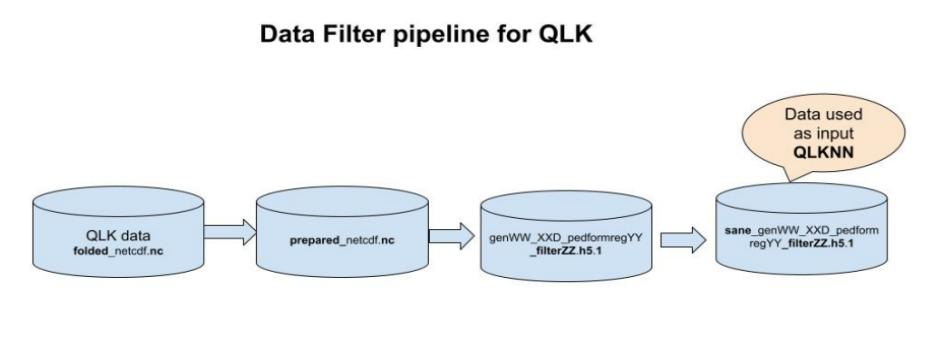

In [3]:
from IPython.display import Image

Image(filename=os.path.join(notebook_dir, diagram_file))

In [4]:
# join the notebook directory with the relative path to the data file requested
folded_data_path = os.path.join(notebook_dir, "..", "data", "raw", "folded_netcdf.nc.1")
prepared_data_path = os.path.join(notebook_dir, "..", "data", "intermediate", "prepared_netcdf.nc")

In [5]:
# read the netCDF file using xarray
folded_data = xr.open_dataset(folded_data_path, engine='netcdf4')

In [6]:
#show the raw_data
folded_data

<xarray.Dataset>
Dimensions:     (Nustar: 8, Ate: 16, x: 1, q: 10, smag: 12, Ati: 16, An: 13,
                 dilution: 5, Ti_Te0: 1, numicoefs: 7, ecoefs: 13, nions: 2,
                 ntheta: 64, numsols: 2, kthetarhos: 16)
Coordinates: (12/17)
  * Nustar      (Nustar) float32 0.09993 0.3298 0.6596 ... 1.999 2.498 2.998
  * Ate         (Ate) float32 5.0 10.0 15.0 20.0 ... 110.0 125.0 140.0 150.0
  * x           (x) float32 0.95
  * q           (q) float32 2.0 3.0 4.0 5.0 6.0 7.0 8.0 10.0 20.0 30.0
  * smag        (smag) float32 1.0 1.5 2.0 3.0 4.0 ... 12.0 16.0 20.0 30.0 40.0
  * Ati         (Ati) float32 5.0 10.0 15.0 20.0 ... 110.0 125.0 140.0 150.0
    ...          ...
    Ai          (nions) float32 ...
    Zi          (nions) float32 ...
  * nions       (nions) float64 0.0 1.0
  * ntheta      (ntheta) float64 0.0 1.0 2.0 3.0 4.0 ... 60.0 61.0 62.0 63.0
  * numsols     (numsols) float64 0.0 1.0
  * kthetarhos  (kthetarhos) float32 0.1 0.175 0.25 0.325 ... 27.0 36.0 45.0
Data variables: (12/50)
    Zeff        (Nustar, Ate, x, q, smag, Ati, An, dilution, Ti_Te0) float32 ...
    Te          (Nustar, Ate, x, q, smag, Ati, An, dilution, Ti_Te0) float32 ...
    rho         (Nustar, Ate, x, q, smag, Ati, An, dilution, Ti_Te0) float32 ...
    normni      (Nustar, Ate, x, q, smag, Ati, An, dilution, Ti_Te0, nions) float32 ...
    Ti          (Nustar, Ate, x, q, smag, Ati, An, dilution, Ti_Te0, nions) float32 ...
    gam_GB      (Nustar, Ate, x, q, smag, Ati, An, dilution, Ti_Te0, kthetarhos, numsols) float32 ...
    ...          ...
    vciITG_GB   (Nustar, Ate, x, q, smag, Ati, An, dilution, Ti_Te0, nions) float32 ...
    vciTEM_GB   (Nustar, Ate, x, q, smag, Ati, An, dilution, Ti_Te0, nions) float32 ...
    kymaxETG    (Nustar, Ate, x, q, smag, Ati, An, dilution, Ti_Te0) float32 ...
    kymaxITG    (Nustar, Ate, x, q, smag, Ati, An, dilution, Ti_Te0) float32 ...
    Ti_Te       (Nustar, Ate, x, q, smag, Ati, An, dilution, Ti_Te0, nions) float32 ...
    Ti_Te1      (Nustar, Ate, x, q, smag, Ati, An, dilution, Ti_Te0) float32 ...
Attributes: (12/37)
    QLK_REPOSITORY_ROOT:   /marconi/home/userexternal/kvandepl/working/QuaLiKiz
    QLK_GITBRANCHNAME:     main
    QLK_GITSHAKEY:         4a269c0dcf77eb0ec8b1053e14aafe6f1d7d2419
    QLK_HOSTNAME:          r000u11l06
    QLK_CLOSEST_RELEASE:   2.8.3
    QLK_COMPILER_VERSION:  ifort (IFORT) 19.1.3.304 20200925
    ...                    ...
    collmult:              1.0
    ETGmult:               1.0
    timeout:               60.0
    rhomin:                0.0
    rhomax:                1.0
    maxpts:                10000000.0

In [7]:
# Access the dimensions and coordinates of the data variables

dimensions = list(folded_data.dims.keys())
coordinates = folded_data.coords

In [8]:
print(coordinates)

Coordinates:
  * Nustar      (Nustar) float32 0.09993 0.3298 0.6596 ... 1.999 2.498 2.998
  * Ate         (Ate) float32 5.0 10.0 15.0 20.0 ... 110.0 125.0 140.0 150.0
  * x           (x) float32 0.95
  * q           (q) float32 2.0 3.0 4.0 5.0 6.0 7.0 8.0 10.0 20.0 30.0
  * smag        (smag) float32 1.0 1.5 2.0 3.0 4.0 ... 12.0 16.0 20.0 30.0 40.0
  * Ati         (Ati) float32 5.0 10.0 15.0 20.0 ... 110.0 125.0 140.0 150.0
  * An          (An) float32 2.0 4.0 6.0 8.0 10.0 ... 30.0 50.0 70.0 90.0 110.0
  * dilution    (dilution) float32 0.5 0.65 0.8 0.9 1.0
  * Ti_Te0      (Ti_Te0) float32 1.0
  * numicoefs   (numicoefs) float64 0.0 1.0 2.0 3.0 4.0 5.0 6.0
  * ecoefs      (ecoefs) float64 0.0 1.0 2.0 3.0 4.0 ... 8.0 9.0 10.0 11.0 12.0
    Ai          (nions) float32 ...
    Zi          (nions) float32 ...
  * nions       (nions) float64 0.0 1.0
  * ntheta      (ntheta) float64 0.0 1.0 2.0 3.0 4.0 ... 60.0 61.0 62.0 63.0
  * numsols     (numsols) float64 0.0 1.0
  * kthetarhos  (kthetar

In [9]:
# Access the values of a certain data variable
folded_data['Ate'].values

array([  5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,  50.,  65.,  80.,
        95., 110., 125., 140., 150.], dtype=float32)

In [10]:
# Display a summary of the dataset
folded_data.info()

xarray.Dataset {
dimensions:
	Nustar = 8 ;
	Ate = 16 ;
	x = 1 ;
	q = 10 ;
	smag = 12 ;
	Ati = 16 ;
	An = 13 ;
	dilution = 5 ;
	Ti_Te0 = 1 ;
	numicoefs = 7 ;
	ecoefs = 13 ;
	nions = 2 ;
	ntheta = 64 ;
	numsols = 2 ;
	kthetarhos = 16 ;

variables:
	float32 Nustar(Nustar) ;
	float32 Ate(Ate) ;
	float32 x(x) ;
	float32 q(q) ;
	float32 smag(smag) ;
	float32 Ati(Ati) ;
	float32 An(An) ;
	float32 dilution(dilution) ;
	float32 Ti_Te0(Ti_Te0) ;
	float64 numicoefs(numicoefs) ;
	float64 ecoefs(ecoefs) ;
	float32 Ai(nions) ;
	float32 Zi(nions) ;
	float64 nions(nions) ;
	float64 ntheta(ntheta) ;
	float64 numsols(numsols) ;
	float32 kthetarhos(kthetarhos) ;
	float32 Zeff(Nustar, Ate, x, q, smag, Ati, An, dilution, Ti_Te0) ;
	float32 Te(Nustar, Ate, x, q, smag, Ati, An, dilution, Ti_Te0) ;
	float32 rho(Nustar, Ate, x, q, smag, Ati, An, dilution, Ti_Te0) ;
	float32 normni(Nustar, Ate, x, q, smag, Ati, An, dilution, Ti_Te0, nions) ;
	float32 Ti(Nustar, Ate, x, q, smag, Ati, An, dilution, Ti_Te0, nions)

In [11]:
"""
 Extract information about the dimensions in the netCDF file using netCDF4 library
`dim_names` list contains the names of the dimensions in the file.
`dim_sizes` list contains the number of points along each dimension. 
`min_vals` and `max_vals` lists contain the minimum and maximum values along each dimension.

"""

folded_nc_file = netCDF4.Dataset(folded_data_path, "r")

dim_names = [dim for dim in folded_nc_file.dimensions.keys()]
dim_sizes = [len(folded_nc_file.dimensions[dim]) for dim in dim_names]
min_vals = [folded_nc_file[dim][:].min() for dim in dim_names]
max_vals = [folded_nc_file[dim][:].max() for dim in dim_names]

dim_df = pd.DataFrame({'Dimension': dim_names,
                       'Number of points': dim_sizes,
                       'Min value': min_vals,
                       'Max value': max_vals})

dim_df = dim_df[['Dimension', 'Number of points', 'Min value', 'Max value']]

print(dim_df)



     Dimension  Number of points  Min value   Max value
0       Nustar                 8   0.099932    2.997971
1          Ate                16   5.000000  150.000000
2            x                 1   0.950000    0.950000
3            q                10   2.000000   30.000000
4         smag                12   1.000000   40.000000
5          Ati                16   5.000000  150.000000
6           An                13   2.000000  110.000000
7     dilution                 5   0.500000    1.000000
8       Ti_Te0                 1   1.000000    1.000000
9    numicoefs                 7   0.000000    6.000000
10      ecoefs                13   0.000000   12.000000
11       nions                 2   0.000000    1.000000
12      ntheta                64   0.000000   63.000000
13     numsols                 2   0.000000    1.000000
14  kthetarhos                16   0.100000   45.000000


In [12]:
# Extract information about the dimensions and missing values in the netCDF file

dim_names = [dim for dim in folded_nc_file.dimensions.keys()]
dim_sizes = [len(folded_nc_file.dimensions[dim]) for dim in dim_names]
missing_counts = [np.count_nonzero(np.isnan(folded_nc_file[dim][:])) for dim in dim_names]

dim_df = pd.DataFrame({'Dimension': dim_names,
                       'Number of points': dim_sizes,
                       'Missing values': missing_counts})

dim_df = dim_df[['Dimension', 'Number of points', 'Missing values']]

print(dim_df)

     Dimension  Number of points  Missing values
0       Nustar                 8               0
1          Ate                16               0
2            x                 1               0
3            q                10               0
4         smag                12               0
5          Ati                16               0
6           An                13               0
7     dilution                 5               0
8       Ti_Te0                 1               0
9    numicoefs                 7               0
10      ecoefs                13               0
11       nions                 2               0
12      ntheta                64               0
13     numsols                 2               0
14  kthetarhos                16               0


In [13]:
# Print the dimensions of the raw data
print(folded_nc_file.dimensions.keys())

dict_keys(['Nustar', 'Ate', 'x', 'q', 'smag', 'Ati', 'An', 'dilution', 'Ti_Te0', 'numicoefs', 'ecoefs', 'nions', 'ntheta', 'numsols', 'kthetarhos'])


In [14]:
# Print the variables in the raw data
print(folded_nc_file.variables.keys())

dict_keys(['Nustar', 'Ate', 'x', 'q', 'smag', 'Ati', 'An', 'dilution', 'Ti_Te0', 'numicoefs', 'ecoefs', 'Ai', 'Zi', 'nions', 'ntheta', 'numsols', 'kthetarhos', 'Zeff', 'Te', 'rho', 'normni', 'Ti', 'gam_GB', 'ome_GB', 'pfe_GB', 'pfi_GB', 'efe_GB', 'efi_GB', 'vfi_GB', 'efeETG_GB', 'efeITG_GB', 'efeTEM_GB', 'efiITG_GB', 'efiTEM_GB', 'pfeITG_GB', 'pfeTEM_GB', 'pfiITG_GB', 'pfiTEM_GB', 'vfiITG_GB', 'vfiTEM_GB', 'cke', 'cki', 'dfe_GB', 'dfi_GB', 'vte_GB', 'vti_GB', 'vce_GB', 'vci_GB', 'vri_GB', 'dfeITG_GB', 'dfeTEM_GB', 'dfiITG_GB', 'dfiTEM_GB', 'vriITG_GB', 'vriTEM_GB', 'vteITG_GB', 'vteTEM_GB', 'vtiITG_GB', 'vtiTEM_GB', 'vceITG_GB', 'vceTEM_GB', 'vciITG_GB', 'vciTEM_GB', 'kymaxETG', 'kymaxITG', 'Ti_Te', 'Ti_Te1'])


In [15]:
folded_nc_file.variables['efi_GB']

<class 'netCDF4._netCDF4.Variable'>
float32 efi_GB(Nustar, Ate, x, q, smag, Ati, An, dilution, Ti_Te0, nions)
    _FillValue: nan
    coordinates: Zi Ai
unlimited dimensions: 
current shape = (8, 16, 1, 10, 12, 16, 13, 5, 1, 2)
filling on

In [16]:
Ati = folded_nc_file.variables['Ati'][:]
print(Ati)
efi_GB = folded_nc_file.variables['efi_GB'][:]
print("Shape of Ati:", np.shape(Ati))
print("Shape of efi_GB:", np.shape(efi_GB))



[  5.  10.  15.  20.  25.  30.  35.  40.  50.  65.  80.  95. 110. 125.
 140. 150.]
Shape of Ati: (16,)
Shape of efi_GB: (8, 16, 1, 10, 12, 16, 13, 5, 1, 2)


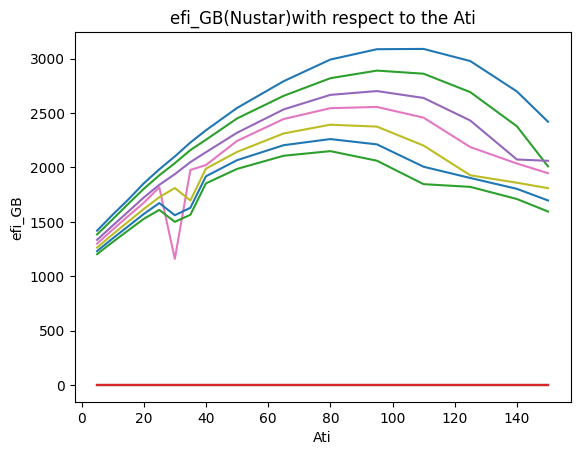

In [17]:
#efi_GB(Nustar, Ate, x, q, smag, Ati, An, dilution, Ti_Te0, nions)
#Shape of efi_GB: (8, 16, 1, 10, 12, 16, 13, 5, 1, 2)
#nions are removed from the data later so we wont take in consideration
x= Ati
for i in range (0,7):
    y=efi_GB[i, 15, 0, 9, 11, :, 12, 4, 0]
    plt.plot(x,y)
    plt.xlabel('Ati')
plt.ylabel('efi_GB')
plt.title('efi_GB(Nustar)with respect to the Ati')
plt.show()



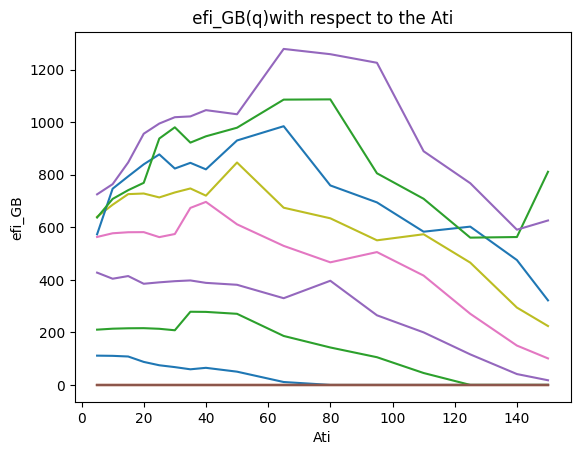

In [18]:
x= Ati
for i in range (0,8):
    y=efi_GB[7,15, 0, i, 11, :, 12, 4, 0]
    plt.plot(x,y)
plt.xlabel('Ati')
plt.ylabel('efi_GB')
plt.title(' efi_GB(q)with respect to the Ati ')
plt.show()

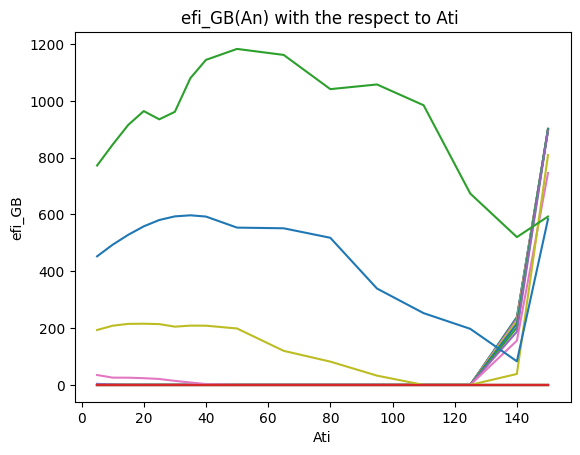

In [19]:
#efi_GB(Nustar, Ate, x, q, smag, Ati, An, dilution, Ti_Te0, nions)
#Shape of efi_GB: (8, 16, 1, 10, 12, 16, 13, 5, 1, 2)

x= Ati
for i in range (0,12):
    y=efi_GB[7,15, 0, 9, 11,:,i, 4, 0]
    plt.plot(x,y)
plt.xlabel('Ati')
plt.ylabel('efi_GB')
plt.title('efi_GB(An) with the respect to Ati ')
plt.show()

## <span style="color:blue"><b>Description of second file( prepared_netcdf.nc)</b></span>

In [20]:


prepared_nc_file = netCDF4.Dataset(prepared_data_path, "r")

dim_names = [dim for dim in prepared_nc_file.dimensions.keys()]
dim_sizes = [len(prepared_nc_file.dimensions[dim]) for dim in dim_names]
min_vals = [prepared_nc_file[dim][:].min() for dim in dim_names]
max_vals = [prepared_nc_file[dim][:].max() for dim in dim_names]

dim_df = pd.DataFrame({'Dimension': dim_names,
                       'Number of points': dim_sizes,
                       'Min value': min_vals,
                       'Max value': max_vals})

dim_df = dim_df[['Dimension', 'Number of points', 'Min value', 'Max value']]

print(dim_df)


     Dimension  Number of points  Min value   Max value
0       Nustar                 8   0.099932    2.997971
1          Ate                16   5.000000  150.000000
2            x                 1   0.950000    0.950000
3            q                10   2.000000   30.000000
4         smag                12   1.000000   40.000000
5          Ati                16   5.000000  150.000000
6           An                13   2.000000  110.000000
7     dilution                 5   0.500000    1.000000
8       Ti_Te0                 1   1.000000    1.000000
9    numicoefs                 7   0.000000    6.000000
10      ecoefs                13   0.000000   12.000000
11      ntheta                64   0.000000   63.000000
12     numsols                 2   0.000000    1.000000
13  kthetarhos                16   0.100000   45.000000


In [21]:
# Extract information about the dimensions and missing values in the prepared netCDF file

dim_names = [dim for dim in prepared_nc_file.dimensions.keys()]
dim_sizes = [len(prepared_nc_file.dimensions[dim]) for dim in dim_names]
missing_counts = [np.count_nonzero(np.isnan(prepared_nc_file[dim][:])) for dim in dim_names]

dim_df = pd.DataFrame({'Dimension': dim_names,
                       'Number of points': dim_sizes,
                       'Missing values': missing_counts})

dim_df = dim_df[['Dimension', 'Number of points', 'Missing values']]

print(dim_df)

     Dimension  Number of points  Missing values
0       Nustar                 8               0
1          Ate                16               0
2            x                 1               0
3            q                10               0
4         smag                12               0
5          Ati                16               0
6           An                13               0
7     dilution                 5               0
8       Ti_Te0                 1               0
9    numicoefs                 7               0
10      ecoefs                13               0
11      ntheta                64               0
12     numsols                 2               0
13  kthetarhos                16               0


In [22]:
print(prepared_nc_file.dimensions.keys())

dict_keys(['Nustar', 'Ate', 'x', 'q', 'smag', 'Ati', 'An', 'dilution', 'Ti_Te0', 'numicoefs', 'ecoefs', 'ntheta', 'numsols', 'kthetarhos'])


In [23]:
# Print the variables 
print(prepared_nc_file.variables.keys())


dict_keys(['Nustar', 'Ate', 'x', 'q', 'smag', 'Ati', 'An', 'dilution', 'Ti_Te0', 'numicoefs', 'ecoefs', 'ntheta', 'numsols', 'kthetarhos', 'gam_leq_GB', 'gam_great_GB', 'TEM', 'ITG', 'ETG', 'absambi', 'pfeITG_GB', 'pfeTEM_GB', 'pfiITG_GB', 'pfiTEM_GB', 'Zeff', 'Te', 'rho', 'normni', 'Ti', 'gam_GB', 'ome_GB', 'pfe_GB', 'pfi_GB', 'efe_GB', 'efi_GB', 'vfi_GB', 'efeETG_GB', 'efeITG_GB', 'efeTEM_GB', 'efiITG_GB', 'efiTEM_GB', 'cke', 'cki', 'dfe_GB', 'dfi_GB', 'vte_GB', 'vti_GB', 'vce_GB', 'vci_GB', 'vri_GB', 'dfeITG_GB', 'dfeTEM_GB', 'dfiITG_GB', 'dfiTEM_GB', 'vteITG_GB', 'vteTEM_GB', 'vtiITG_GB', 'vtiTEM_GB', 'vceITG_GB', 'vceTEM_GB', 'vciITG_GB', 'vciTEM_GB', 'kymaxETG', 'kymaxITG', 'Ti_Te', 'Ti_Te1', 'vae_GB', 'vai_GB', 'vaeITG_GB', 'vaiITG_GB', 'vaeTEM_GB', 'vaiTEM_GB', 'dimx'])



## <span style="color:blue"><b>Compare between the folded_nc_file & prepared_nc_file</b></span>





In [24]:
nc1 = netCDF4.Dataset(folded_data_path, 'r')
nc2 = netCDF4.Dataset(prepared_data_path, 'r')

# check dimensions
dim1 = set(nc1.dimensions.keys())
dim2 = set(nc2.dimensions.keys())
if dim1 != dim2:
    print("The dimensions of the two datasets are different:")
    print("Dimensions in folded file but not in prepared file:", dim1 - dim2)
    print("Dimensions in prepared file but not in folded file:", dim2 - dim1)
else:
    print("The dimensions of the two datasets match.")

# check variables
var1 = set(nc1.variables.keys())
var2 = set(nc2.variables.keys())
if var1 != var2:
    print("The variables in the two datasets are different:")
    print("Variables in folded file but not in prepared :", var1 - var2)
    print("Variables in prepared file but not in folded:", var2 - var1)
else:
    print("The variables in the two datasets match.")

# close the netCDF files
nc1.close()
nc2.close()

The dimensions of the two datasets are different:
Dimensions in folded file but not in prepared file: {'nions'}
Dimensions in prepared file but not in folded file: set()
The variables in the two datasets are different:
Variables in folded file but not in prepared : {'nions', 'Zi', 'vfiITG_GB', 'vriITG_GB', 'Ai', 'vriTEM_GB', 'vfiTEM_GB'}
Variables in prepared file but not in folded: {'absambi', 'vaeTEM_GB', 'vaiITG_GB', 'vae_GB', 'dimx', 'ITG', 'gam_leq_GB', 'vaeITG_GB', 'gam_great_GB', 'vaiTEM_GB', 'ETG', 'vai_GB', 'TEM'}


In [25]:
#Generate a report and verify the difference between the two files: 
nc_file1 = nc4.Dataset(folded_data_path, "r")
nc_file2 = nc4.Dataset(prepared_data_path, "r")

# Loop over each variable in the folded file
for var_name in nc_file1.variables.keys():
    # Check if the variable exists in both files
    if var_name in nc_file2.variables.keys():
        # Compare the values of the variables
        var1 = nc_file1.variables[var_name][:]
        var2 = nc_file2.variables[var_name][:]

        if not np.array_equal(var1, var2):
            print("The values of variable '{}' in the two files are different.".format(var_name))
        else:
            print("The values of variable '{}' in the two files match.".format(var_name))

# Close the files
nc_file1.close()
nc_file2.close()


The values of variable 'Nustar' in the two files match.
The values of variable 'Ate' in the two files match.
The values of variable 'x' in the two files match.
The values of variable 'q' in the two files match.
The values of variable 'smag' in the two files match.
The values of variable 'Ati' in the two files match.
The values of variable 'An' in the two files match.
The values of variable 'dilution' in the two files match.
The values of variable 'Ti_Te0' in the two files match.
The values of variable 'numicoefs' in the two files match.
The values of variable 'ecoefs' in the two files match.
The values of variable 'ntheta' in the two files match.
The values of variable 'numsols' in the two files match.
The values of variable 'kthetarhos' in the two files match.
The values of variable 'Zeff' in the two files match.
The values of variable 'Te' in the two files match.
The values of variable 'rho' in the two files match.
The values of variable 'normni' in the two files are different.
The v